

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
"The data comes from the FBI's National Instant Criminal Background Check System. The National Instant Criminal Background Check System (NICS) is a United States system for determining if prospective firearms or explosives buyers' name and birth year match those of a person who is not eligible to buy. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, type and subtype.

The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year."


In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading U.S. Census Data
fbi_data = pd.read_csv('U.S. Census Data.csv')
fbi_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [3]:
# Loading excel-sheet of Gun Data
gun_data = pd.read_excel('gun-data.xlsx')
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
# Exploring Census Data
fbi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [5]:
# Exploring Gun Data
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [6]:
fbi_data.isnull().any().sum()

52

In [7]:
fbi_data.duplicated().count()

85

In [8]:
fbi_data.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"American Indian and Alaska Native alone, perce...",(c),"316,984",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,0.834,0.048,50.40%,2.50%,"625,741",0.50%,6.50%,1.50%,"5,778,708",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [9]:
gun_data.isnull().any().sum()


23

In [10]:
gun_data.duplicated().count()

12485

In [11]:
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000




### Data Cleaning (Replace this with more specific notes!)

In [12]:
#Renaming Column names to lowercase for both Datasets
fbi_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [13]:
gun_data.rename(columns = lambda x:x.lower(),inplace=True)
gun_data.head(20)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


In [14]:
#Get state names from Census Data
fbi_data_states = fbi_data.iloc[0].index[2:]
fbi_data_states

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [15]:
#Get state names from Gun Data
gun_data_states = gun_data.groupby('state').sum().index
gun_data_states

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Mariana Islands', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [16]:
#Comparing number states in both DataFrames
len(fbi_data_states),len(gun_data_states)

(50, 55)

In [17]:
#Finding Missing states in Census Data
missing_states = gun_data_states.difference(fbi_data_states)
missing_states

Index(['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico',
       'Virgin Islands'],
      dtype='object')

In [18]:
#Changing Datatype from String Object to Float in Census Data
fbi_columns = fbi_data.iloc[:,2:].columns
for column in fbi_columns:
    fbi_data[column] = fbi_data[column].str.extract('(\d+)').astype(float)

fbi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null float64
Alaska            64 non-null float64
Arizona           65 non-null float64
Arkansas          65 non-null float64
California        65 non-null float64
Colorado          65 non-null float64
Connecticut       65 non-null float64
Delaware          65 non-null float64
Florida           65 non-null float64
Georgia           65 non-null float64
Hawaii            64 non-null float64
Idaho             65 non-null float64
Illinois          65 non-null float64
Indiana           65 non-null float64
Iowa              65 non-null float64
Kansas            65 non-null float64
Kentucky          65 non-null float64
Louisiana         65 non-null float64
Maine             64 non-null float64
Maryland          65 non-null float64
Massachusetts     65 non-null float64
Michigan          64 non-

In [19]:
#Filling float types null values with mean in Census Data
fbi_columns = fbi_data.select_dtypes(float).columns

#function for filling null float values with mean
def fill_mean(columns,dataframe):
    for column in columns:
        column_mean = dataframe[column].mean()
        dataframe[column].fillna(column_mean,inplace=True)

fill_mean(fbi_columns,fbi_data)

In [20]:
#Fill null string values with 'NoRecords' and checking for any other null values
fbi_data.fillna('No Records', inplace=True)
fbi_data.isnull().any().any()

False

In [21]:

#Filling float types null values with mean in Gun Data

gun_columns = gun_data.select_dtypes(float).columns
fill_mean(gun_columns,gun_data)

gun_data.isnull().any().any()

False

In [22]:
#checking for any other null values
gun_data.isnull().any()

month                        False
state                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

In [23]:
# Converting string into datatime format in Gun Data

gun_data.month = pd.to_datetime(gun_data['month'])

gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 : Total number of gun transactions taken place according to Gun Data Excel-Sheet?

In [24]:
#Taking sum of all totals
gun_state = gun_data['totals'].sum()
gun_state

269622638

In [25]:
#Calculating number of days
date_diff = (gun_data['month'].max() - gun_data['month'].min())


269622638 buying and renting of Guns took place according to given data in 6879 i.e., 18 years.



### Research Question 2 : What type of guns are owned the most according to Gun Data Excel-Sheet?

In [26]:
gun_sum = gun_data.sum(axis=0)[:-1]

gun_sum == gun_sum.max()


permit                       False
permit_recheck               False
handgun                      False
long_gun                      True
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
dtype: bool

'long_gun' is the type of Gun which is sold the most 

### Research Question 3 : What is the total Annual Income of all states in 2015?

In [27]:
fbi_data.iloc[52, 2:].sum()

1531393139.0

The total Annual Income of all states in 2015 is 1531393139 ($, 1000).


### Research Question 4: Which states have faced the most growth in gun registrations?

In [28]:
gun_alltime = gun_data.groupby(['month', 'state'])['totals'].sum()
gun_alltime

month       state               
1998-11-01  Alabama                   1062
            Alaska                     145
            Arizona                    379
            Arkansas                   589
            California                2101
            Colorado                   622
            Connecticut                 80
            Delaware                    55
            District of Columbia         0
            Florida                    812
            Georgia                     62
            Guam                         0
            Hawaii                      28
            Idaho                      176
            Illinois                    22
            Indiana                    347
            Iowa                       482
            Kansas                     398
            Kentucky                   840
            Louisiana                  799
            Maine                      100
            Mariana Islands              0
            Maryland 

In [29]:
gun_most_growth = gun_alltime.loc[gun_data['month'].max()] - gun_alltime.loc[gun_data['month'].min()]
gun_most_growth.idxmax()

'Kentucky'

In [30]:
gun_most_growth.loc['Kentucky']

397866

'Kentucky' faced the most growth in gun registrations with total registrations being 397866.

### Research Question 5: What is the overall trend of gun purchases? 

Text(0,0.5,'Background Checks')

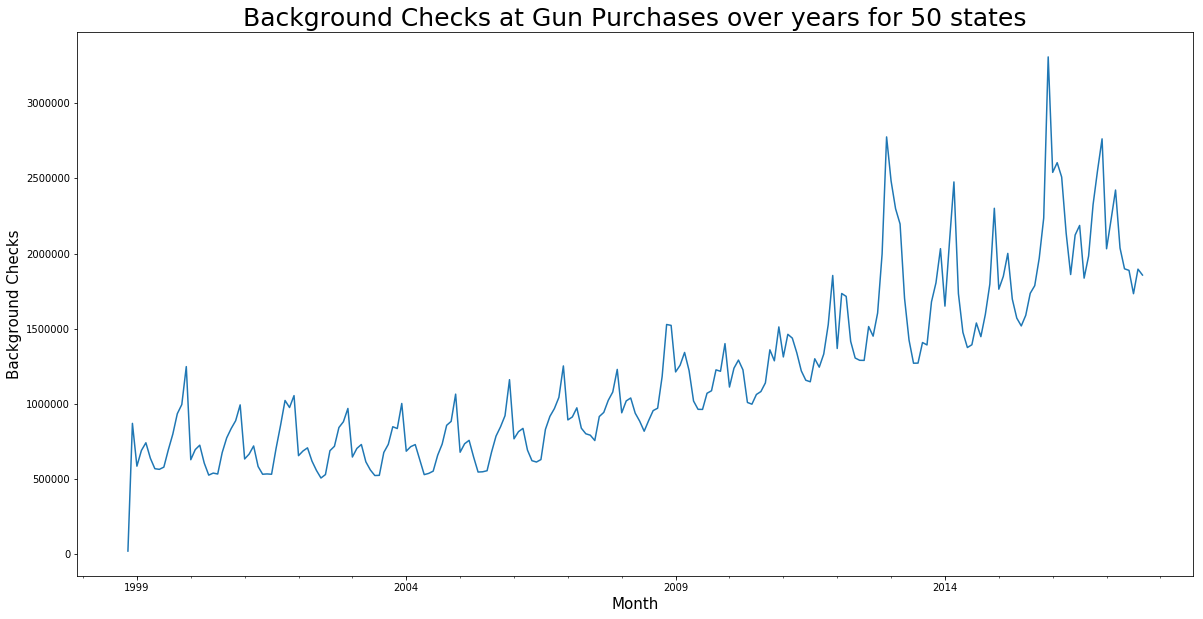

In [57]:
gun__purchase_trend = gun_data.groupby(['month'])['totals'].sum()
ax = gun__purchase_trend.plot(figsize=(20,10))
ax.set_title('Background Checks at Gun Purchases over years for 50 states', fontsize=25)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Background Checks', fontsize=15)


The overall trend is increasing, the speed is becoming faster over time.

### Research Question 6: What type of gun has highest quantity, and a relationship with totals?

In [32]:
gun_type = {}
col_state = gun_data.columns[2:25]

for c in col_state:
    gun_type[c] = gun_data[c].sum()
    
max(gun_type, key=gun_type.get)

'long_gun'

Text(0.5,1,'Highest Registered Gun Correlation with Totals')

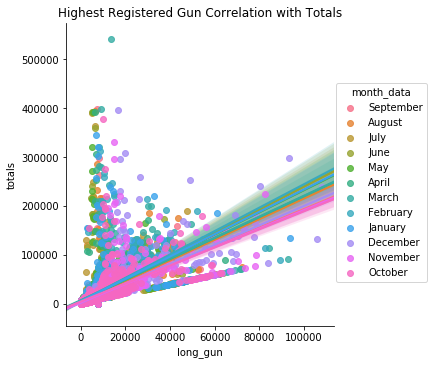

In [59]:
gun_data_copy = gun_data.copy()
month_data = gun_data.month.dt.strftime("%B")
gun_data_copy['month_data']= month_data
sns.lmplot(x = 'long_gun', y = 'totals', hue = 'month_data', data = gun_data_copy);
ax=plt.gca()
ax.set_title('Highest Registered Gun Correlation with Totals')

Long gun is highest registed type of gun in number among the others, it is positively correlated with totals. The estimated linear regression is shown as the blue line, the estimates varies in the light blue shade with 95% confident level.

<a id='conclusions'></a>
## Conclusions

The given dataset includes two dataframes, one a csv and other an excel-sheet, requiring to be loaded differently given their types. The dataframes contained information of almost 18 years, from 1998 to 2017 with various information about guns bought, types of guns, their count and income made from them categorised state-wise.

Due to data present in different tables, drawing conclusions was difficult.However, alot was still be able to draw.From U.S. Census Data, we found the amount of income that was earned in various states. Also, from Gun Data, we categorically found the guns, their types and subtypes and a certain type of them which was mostly bought.

Overall, we understood that the overall trend of buying Guns has increased over the years.This can be considered as a threat as more and more people are having harmful weapons. A large amount of Gun was out for renting and we don't know how many of them were returned increasing the risk even more.

Atlast, considering the states which face most transactions with Guns and type of them which are mostly sold, we can monitor and inspect the buyers and maybe limit the selling of these in the states facing most transaction as it is risky.

The limitations of data can be the data being in 2 seperate files of different types.Also missing records of five states, namely 'District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico' and 'Virgin Islands', may have contained crucial data which could've used for analysis but needed to be dropped due to absence in U.S. Census Data.

Source Index
Data

    U.S. Census Bureau:
        Annual population estimates for the U.S.
        Population Under 18 Years
    FBI National Instant Criminal Background Check System:
        NICS webpage
        Data repository


In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0